In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Fitpluse_Helath_Anomaly_Detection/clean_fitness_data_minute.csv')

In [ ]:
df

,timestamp,heart_rate,steps,sleep
0,2025-04-10 09:00:00+00:00,63.0,528.0,0.0
1,2025-04-10 09:01:00+00:00,NaN,NaN,NaN
2,2025-04-10 09:02:00+00:00,NaN,NaN,NaN
3,2025-04-10 09:03:00+00:00,NaN,NaN,NaN
4,2025-04-10 09:04:00+00:00,NaN,NaN,NaN
...,...,...,...,...
2491,2025-04-12 02:31:00+00:00,NaN,NaN,NaN
2492,2025-04-12 02:32:00+00:00,NaN,NaN,NaN
2493,2025-04-12 02:33:00+00:00,NaN,NaN,NaN
2494,2025-04-12 02:34:00+00:00,NaN,NaN,NaN


In [ ]:
df_prophet = df.rename(columns={
    "timestamp": "ds",
    "heart_rate": "y"
})

df_prophet["ds"] = pd.to_datetime(df_prophet["ds"]).dt.tz_localize(None)

In [ ]:
from prophet import Prophet

model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=10, freq="T")

/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  dates = pd.date_range(


In [ ]:
forecast = model.predict(future)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2025-04-10 09:00:00,119.405763,78.023810,164.247937,119.405763,119.405763,0.0,0.0,0.0,0.0,0.0,0.0,119.405763
1,2025-04-10 09:01:00,119.406753,71.992188,163.432378,119.406753,119.406753,0.0,0.0,0.0,0.0,0.0,0.0,119.406753
2,2025-04-10 09:02:00,119.407743,75.857516,163.838186,119.407743,119.407743,0.0,0.0,0.0,0.0,0.0,0.0,119.407743
3,2025-04-10 09:03:00,119.408733,74.526961,164.832425,119.408733,119.408733,0.0,0.0,0.0,0.0,0.0,0.0,119.408733
4,2025-04-10 09:04:00,119.409723,77.749370,166.043038,119.409723,119.409723,0.0,0.0,0.0,0.0,0.0,0.0,119.409723
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,2025-04-12 02:41:00,121.879388,73.683905,164.743936,121.879388,121.879388,0.0,0.0,0.0,0.0,0.0,0.0,121.879388
2502,2025-04-12 02:42:00,121.880377,77.779152,166.590584,121.880377,121.880377,0.0,0.0,0.0,0.0,0.0,0.0,121.880377
2503,2025-04-12 02:43:00,121.881366,80.980396,165.446015,121.881366,121.881366,0.0,0.0,0.0,0.0,0.0,0.0,121.881366
2504,2025-04-12 02:44:00,121.882355,78.505995,165.762044,121.882355,121.882355,0.0,0.0,0.0,0.0,0.0,0.0,121.882355


| Time  | Actual HR | Prophet Expected | Anomaly? |
| ----- | --------- | ---------------- | -------- |
| 10:01 | 72        | 70–75            | ❌ No     |
| 10:02 | 95        | 70–75            | ✅ Yes    |


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


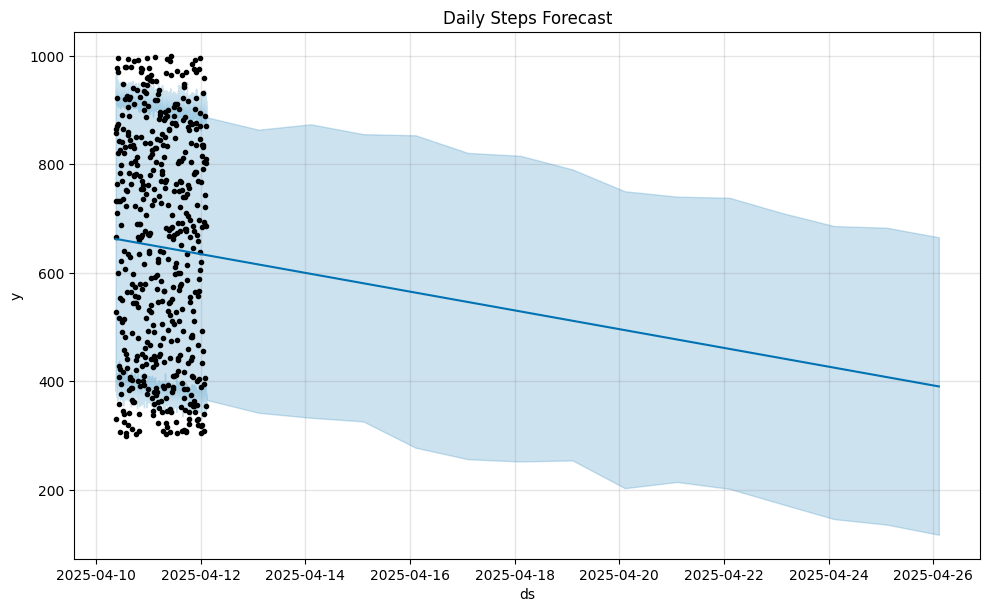

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data
df_steps = df[["timestamp", "steps"]].rename(
    columns={"timestamp": "ds", "steps": "y"}
)
df_steps["ds"] = pd.to_datetime(df_steps["ds"]).dt.tz_localize(None)

# Train model
model_steps = Prophet()
model_steps.fit(df_steps)

# Predict
future_steps = model_steps.make_future_dataframe(periods=14, freq="D")
forecast_steps = model_steps.predict(future_steps)

# Plot
model_steps.plot(forecast_steps)
plt.title("Daily Steps Forecast")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


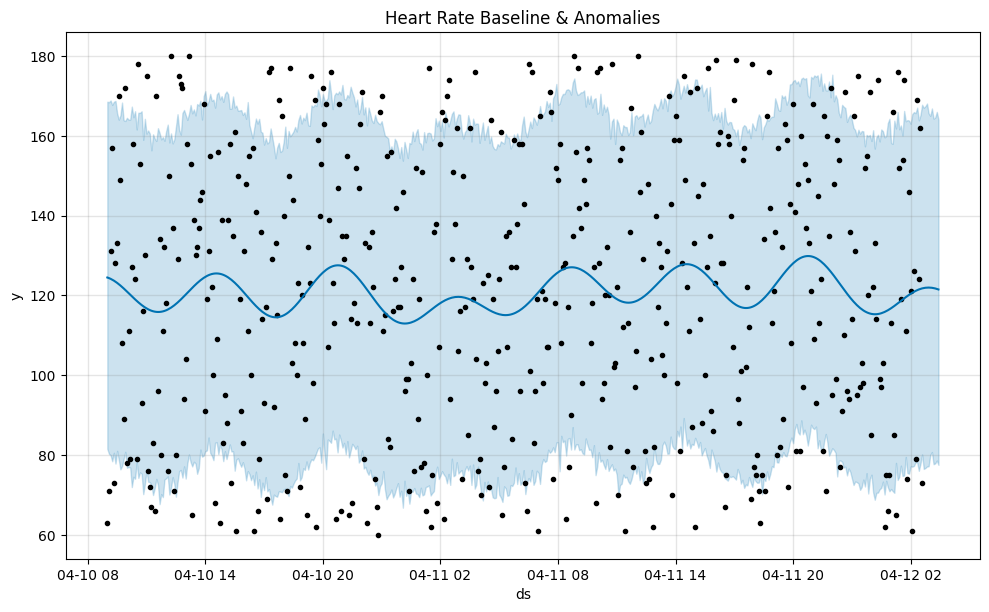

In [ ]:
# Resample heart rate
df_hr = (
    df[["timestamp", "heart_rate"]]
    .copy()
)
df_hr["timestamp"] = pd.to_datetime(df_hr["timestamp"]).dt.tz_localize(None) # Convert 'timestamp' column to datetime objects and remove timezone
df_hr = df_hr.set_index("timestamp").resample("5min").mean().reset_index()

# Prophet format
df_hr = df_hr.rename(columns={"timestamp": "ds", "heart_rate": "y"})
df_hr["ds"] = pd.to_datetime(df_hr["ds"])

# Train
model_hr = Prophet(daily_seasonality=True)
model_hr.fit(df_hr)

# Predict
future_hr = model_hr.make_future_dataframe(periods=10, freq="5min")
forecast_hr = model_hr.predict(future_hr)

# Plot
model_hr.plot(forecast_hr)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


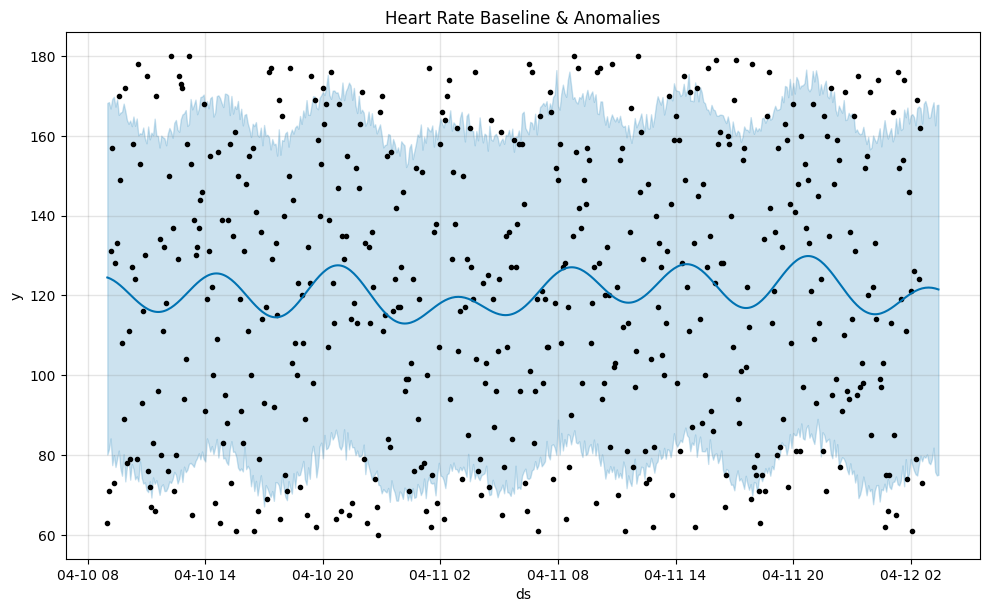

In [ ]:
# Filter the dataframe for that user (removed as 'participant_id' is not in df)
df_user = df[["timestamp", "heart_rate"]].copy()

# Convert to datetime and resample
df_user["timestamp"] = pd.to_datetime(df_user["timestamp"]).dt.tz_localize(None)
df_user = df_user.set_index("timestamp").resample("5min").mean().reset_index()

# Prepare for Prophet
df_user = df_user.rename(columns={"timestamp": "ds", "heart_rate": "y"})
df_user["ds"] = pd.to_datetime(df_user["ds"])

# Train Prophet
model_user = Prophet(daily_seasonality=True)
model_user.fit(df_user)

# Predict
future_user = model_user.make_future_dataframe(periods=10, freq="5min")
forecast_user = model_user.predict(future_user)

# Plot
model_user.plot(forecast_user)
plt.title("Heart Rate Baseline & Anomalies")
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


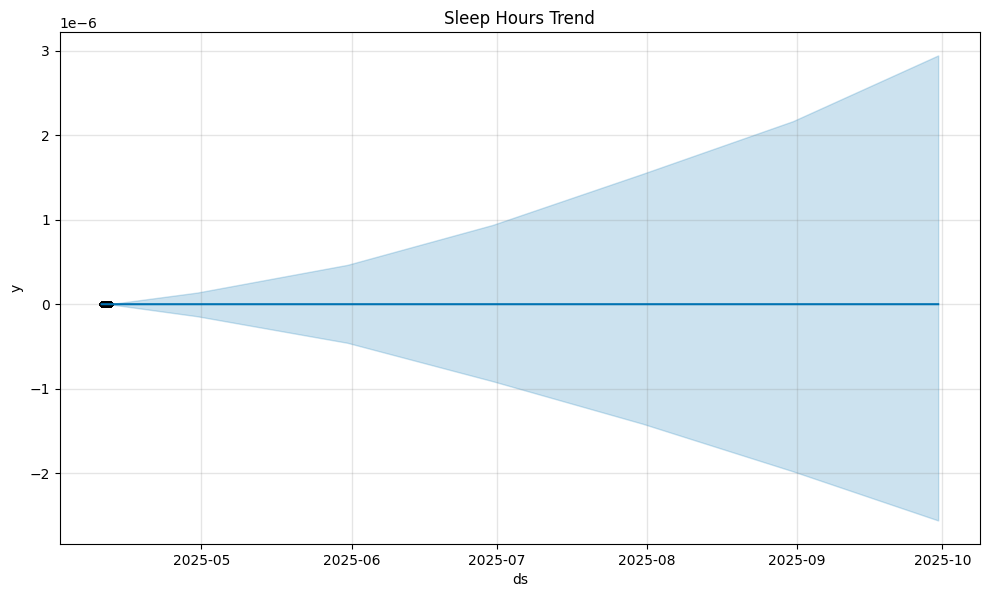

In [ ]:
df_sleep = df[["timestamp", "sleep"]].rename(
    columns={"timestamp": "ds", "sleep": "y"}
)
df_sleep["ds"] = pd.to_datetime(df_sleep["ds"]).dt.tz_localize(None)

model_sleep = Prophet(weekly_seasonality=True)
model_sleep.fit(df_sleep)

future_sleep = model_sleep.make_future_dataframe(periods=6, freq="M")
forecast_sleep = model_sleep.predict(future_sleep)

model_sleep.plot(forecast_sleep)
plt.title("Sleep Hours Trend")
plt.show()

| Alias               | Description                                     |
| ------------------- | ----------------------------------------------- |
| `B`                 | Business day frequency                          |
| `C`                 | Custom business day                             |
| `D`                 | Calendar day frequency (daily)                  |
| `W`                 | Weekly frequency (Sunday as default)            |
| `W-MON`, `W-TUE`, … | Weekly frequency anchored on a specific weekday |
| `M`                 | Month end frequency                             |
| `SM`                | Semi-month end (15th and end of month)          |
| `BM`                | Business month end                              |
| `CBM`               | Custom business month end                       |
| `MS`                | Month start frequency                           |
| `BMS`               | Business month start                            |
| `Q`                 | Quarter end frequency (calendar quarter)        |
| `BQ`                | Business quarter end                            |
| `QS`                | Quarter start                                   |
| `BQS`               | Business quarter start                          |
| `A` or `Y`          | Year end frequency (December 31st)              |
| `BA` or `BY`        | Business year end                               |
| `AS` or `YS`        | Year start frequency                            |
| `BAS` or `BYS`      | Business year start                             |


| Alias        | Description           |
| ------------ | --------------------- |
| `H`          | Hourly frequency      |
| `T` or `min` | Minute frequency      |
| `S`          | Second frequency      |
| `L` or `ms`  | Millisecond frequency |
| `U` or `us`  | Microsecond frequency |
| `N`          | Nanosecond frequency  |


In [ ]:
df.columns

Index(['timestamp', 'heart_rate', 'steps', 'sleep'], dtype='object')

In [ ]:
import pandas as pd

df["Time"] = pd.to_datetime(df["timestamp"]).dt.tz_localize(None)

# Create day window
df["day"] = df["Time"].dt.date

In [ ]:
from tsfresh.utilities.dataframe_functions import roll_time_series

value_columns = ["heart_rate", "steps", "sleep"]

tsfresh_input = df.melt(
    id_vars=["Time", "day"],
    value_vars=value_columns,
    var_name="kind",
    value_name="value"
)

tsfresh_input = tsfresh_input.rename(columns={
    "day": "id",
    "Time": "time"
})

tsfresh_input = tsfresh_input[["id", "time", "kind", "value"]]

In [ ]:
from tsfresh import extract_features
import numpy as np

tsfresh_features = extract_features(
    tsfresh_input_cleaned,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value"
)

Feature Extraction: 100%|██████████| 9/9 [00:12<00:00,  1.44s/it]


In [ ]:
# Remove NaN values from the 'value' column in tsfresh_input
tsfresh_input_cleaned = tsfresh_input.dropna(subset=['value']).copy()

In [ ]:
from tsfresh import extract_features
import numpy as np

tsfresh_features = extract_features(
    tsfresh_input_cleaned,
    column_id="id",
    column_sort="time",
    column_kind="kind",
    column_value="value"
)

Feature Extraction: 100%|██████████| 9/9 [00:02<00:00,  4.45it/s]


In [ ]:
# Safety cleaning
tsfresh_features.replace([np.inf, -np.inf], np.nan, inplace=True)
tsfresh_features.fillna(0, inplace=True)

#If infinity / NaN exists → TSFresh WILL FAIL.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = tsfresh_features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
tsfresh_features["cluster"] = kmeans.fit_predict(X_scaled)

In [ ]:
# Impute NaN values in the original df before tsfresh processing
df['heart_rate'] = df['heart_rate'].ffill()
df['steps'] = df['steps'].fillna(0)
df['sleep'] = df['sleep'].fillna(0)

# Display a sample to confirm imputation
print("DataFrame after NaN imputation:")
display(df.head())

DataFrame after NaN imputation:


,timestamp,heart_rate,steps,sleep,Time,day
0,2025-04-10 09:00:00+00:00,63.0,528.0,0.0,2025-04-10 09:00:00,2025-04-10
1,2025-04-10 09:01:00+00:00,63.0,0.0,0.0,2025-04-10 09:01:00,2025-04-10
2,2025-04-10 09:02:00+00:00,63.0,0.0,0.0,2025-04-10 09:02:00,2025-04-10
3,2025-04-10 09:03:00+00:00,63.0,0.0,0.0,2025-04-10 09:03:00,2025-04-10
4,2025-04-10 09:04:00+00:00,63.0,0.0,0.0,2025-04-10 09:04:00,2025-04-10


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = {}

# Calculate n_samples from X_scaled
n_samples = X_scaled.shape[0]

# Adjust the range for k to ensure k < n_samples
for k in range(2, min(7, n_samples)):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    sil_scores[k] = score
    print(f"K={k}, Silhouette Score={score:.3f}")

K=2, Silhouette Score=0.073


In [ ]:
print(tsfresh_features.groupby("cluster").mean())

         heart_rate__variance_larger_than_standard_deviation  \
cluster                                                        
0                                                      1.0     
1                                                      1.0     
2                                                      1.0     

         heart_rate__has_duplicate_max  heart_rate__has_duplicate_min  \
cluster                                                                 
0                                  1.0                            1.0   
1                                  1.0                            1.0   
2                                  1.0                            1.0   

         heart_rate__has_duplicate  heart_rate__sum_values  \
cluster                                                      
0                              1.0                174705.0   
1                              1.0                 17983.0   
2                              1.0                108455.0   

  

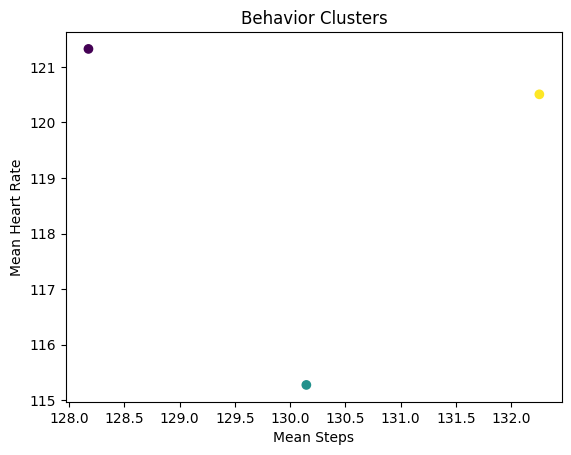

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(
    tsfresh_features["steps__mean"],
    tsfresh_features["heart_rate__mean"],
    c=tsfresh_features["cluster"]
)
plt.xlabel("Mean Steps")
plt.ylabel("Mean Heart Rate")
plt.title("Behavior Clusters")
plt.show()
